In [1]:
import pandas as pd
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.drop(columns=['CUST_ID'], inplace=True)

In [7]:
df.describe().loc[['mean', '50%'], ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']]

,CREDIT_LIMIT,MINIMUM_PAYMENTS
mean,4494.44945,864.206542
50%,3000.00000,312.343947


In [8]:
for col in ('CREDIT_LIMIT', 'MINIMUM_PAYMENTS'):
    df[col] = df[col].fillna(df[col].median())

In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
scaler = StandardScaler()

In [12]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) 

In [13]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [14]:
inertias = []
k_vals = list(range(2, 10))

In [15]:
for k in k_vals:
    k_m = KMeans(n_clusters=k)
    k_m.fit(df)
    inertias.append(k_m.inertia_)


Text(0, 0.5, 'inertia')

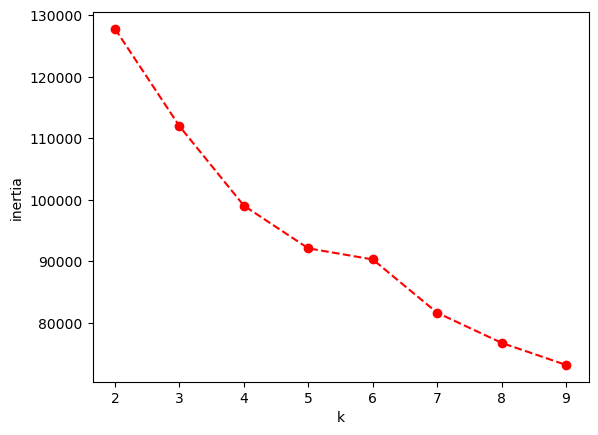

In [16]:
plt.plot(k_vals, inertias, marker='o', linestyle='--', c='r')
plt.xlabel('k')
plt.ylabel('inertia')

In [17]:
for k in k_vals:
    k_m = KMeans(n_clusters=k)
    preds = k_m.fit_predict(df)
    print(f'silhouette: {silhouette_score(df, preds)}, where k = {k}')


silhouette: 0.27953987242960154, where k = 2
silhouette: 0.18227682063262976, where k = 3
silhouette: 0.16625238324174793, where k = 4
silhouette: 0.20993244676571873, where k = 5
silhouette: 0.2035468201753135, where k = 6
silhouette: 0.20425263707571678, where k = 7
silhouette: 0.2086979796432442, where k = 8
silhouette: 0.19874746502736895, where k = 9


In [18]:
k_m = KMeans(n_clusters=3)
k_means_clustering_data = k_m.fit_predict(df)

In [19]:
for k in k_vals:
    agglomer_k = AgglomerativeClustering(n_clusters=k)
    preds = agglomer_k.fit_predict(df)
    print(f'silhouette: {silhouette_score(df, preds)}, where k = {k}')

silhouette: 0.19210277656035374, where k = 2
silhouette: 0.1674469835551831, where k = 3
silhouette: 0.15978366986218748, where k = 4
silhouette: 0.17625723552382333, where k = 5
silhouette: 0.15927727217610124, where k = 6
silhouette: 0.16173398544339443, where k = 7
silhouette: 0.1608571104881932, where k = 8
silhouette: 0.16681499088780727, where k = 9


In [20]:
agglomer_k = AgglomerativeClustering(n_clusters=3)
ierarch_clustering_data = k_m.fit_predict(df)

In [21]:
for min_size in range(40, 161, 20):
    hdbscan_k = hdbscan.HDBSCAN(min_samples=min_size)
    preds = hdbscan_k.fit_predict(df)
    print(f'silhouette: {silhouette_score(df[preds !=-1], preds[preds != -1])}, where min_size = {min_size}')

silhouette: 0.1757192513250203, where min_size = 40
silhouette: 0.24832197294573619, where min_size = 60
silhouette: 0.26635954732327743, where min_size = 80
silhouette: 0.6747614776740322, where min_size = 100
silhouette: 0.6618305299827133, where min_size = 120
silhouette: 0.6885113776579946, where min_size = 140
silhouette: 0.6793426650580322, where min_size = 160


In [22]:
hdbscan_k = hdbscan.HDBSCAN(min_samples=100)
hdbscan_clustering_data = hdbscan_k.fit_predict(df)

<BarContainer object of 3 artists>

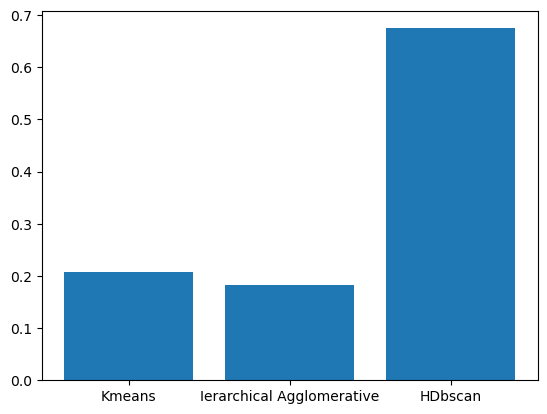

In [23]:
plt.bar(['Kmeans', 'Ierarchical Agglomerative', 'HDbscan'], [silhouette_score(df, k_means_clustering_data),
                                                             silhouette_score(df, ierarch_clustering_data),
                                                             silhouette_score(df[hdbscan_clustering_data != -1], hdbscan_clustering_data[hdbscan_clustering_data != -1])])

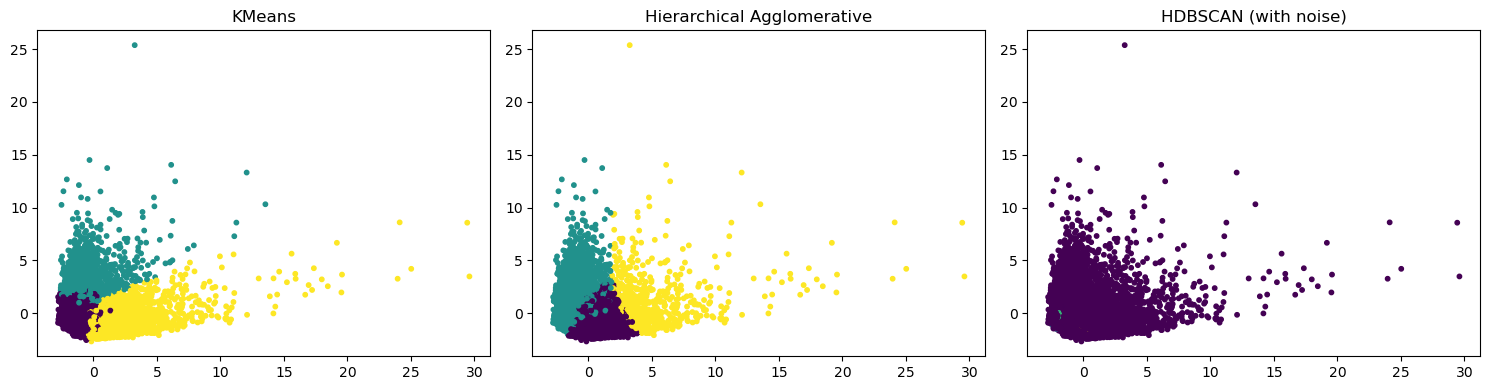

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.values)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=k_means_clustering_data, s=10)
axes[0].set_title('KMeans')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=ierarch_clustering_data, s=10)
axes[1].set_title('Hierarchical Agglomerative')

axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=hdbscan_clustering_data, s=10)
axes[2].set_title('HDBSCAN (with noise)')

plt.tight_layout()
plt.show()


In [25]:
print(np.unique(hdbscan_clustering_data, return_counts=True))

(array([-1,  0,  1,  2], dtype=int64), array([7796,  201,  789,  164], dtype=int64))


Text(0.5, 1.0, 'HDBSCAN (without noise)')

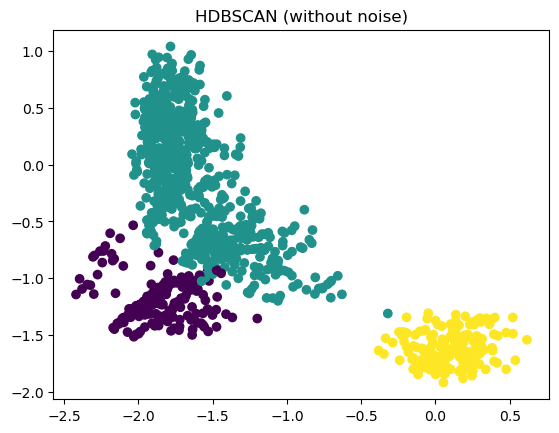

In [26]:
mask = hdbscan_clustering_data != -1
plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=hdbscan_clustering_data[mask])
plt.title('HDBSCAN (without noise)')